In [ ]:
import pandas as pd
df = pd.read_csv('fake_news_data.csv')

In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
X = df.drop('label', axis = 1)

In [ ]:
y = df['label']

In [ ]:
X.shape

(20800, 4)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#dropping na values
df = df.dropna()

In [ ]:
df.shape

(18285, 5)

We are predicting fake news based on column 'text'

In [ ]:
messages = df.copy()
messages.reset_index(inplace=True)

In [ ]:
messages['text'][6]

'PARIS  —   France chose an idealistic, traditional   candidate in Sunday’s primary to represent the Socialist and   parties in the presidential election this spring. The candidate, Benoît Hamon, 49, who ran on the slogan that he would “make France’s heart beat,” bested Manuel Valls, the former prime minister, whose campaign has promoted more   policies and who has a strong    background. Mr. Hamon appeared to have won by a wide margin, with incomplete returns showing him with an estimated 58 percent of the vote to Mr. Valls’s 41 percent. “Tonight the left holds its head up high again it is looking to the future,” Mr. Hamon said, addressing his supporters. “Our country needs the left, but a modern, innovative left,” he said. Mr. Hamon’s victory was the clearest sign yet that voters on the left want a break with the policies of President François Hollande, who in December announced that he would not seek  . However, Mr. Hamon’s strong showing is unlikely to change widespread assessments

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#now we are cleaning the column text so that out nlp model will learn from titile when we supply it
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range (0,len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[6]

'pari franc chose idealist tradit candid sunday primari repres socialist parti presidenti elect spring candid beno hamon ran slogan would make franc heart beat best manuel vall former prime minist whose campaign promot polici strong background mr hamon appear wide margin incomplet return show estim percent vote mr vall percent tonight left hold head high look futur mr hamon said address support countri need left modern innov left said mr hamon victori clearest sign yet voter left want break polici presid fran oi holland decemb announc would seek howev mr hamon strong show unlik chang widespread assess candid littl chanc make second round vote gener elect first round gener elect set april runoff may socialist parti deepli divid one measur lack popular enthusiasm rel low number peopl vote two million peopl vote second round primari sunday contrast million second round last presidenti primari left howev much convent wisdom elect go thrown question past week lead candid fran oi fillon repr

In [ ]:
#applying tfidfvectorizer to create tfidf model
#here we are passing max_features = 5000 meaning take the 5000 mostly occuring words
#and ngram_range = (1,3) meaning the model will take combination of 1 word, then 2 word and then 3 word

tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [ ]:
X.shape

(18285, 5000)

In [ ]:
#our output/dependent feature
y = messages['label']

In [ ]:
#dividing the dataseto test and train date
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state = 0)

In [ ]:
#if you want to see how the tfidf model is created, just seeing the top 20 features/combination of words it took
#here we can see combination of 1 word, 2 words and 3 words since we to ngram_range as (1,3)
tfidf_v.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [ ]:
#to understand the parameters of tfidf model
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
X_train.shape

(12250, 5000)

In [ ]:
#to convert the X_train in the form of a DF
count_df = pd.DataFrame(X_train, columns = tfidf_v.get_feature_names())
count_df.head(10)

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,absolut,absorb,absurd,abu,abus,academ,academi,acceler,accept,access,access pipelin,accid,accommod,accompani,accomplish,accord,accord report,account,accumul,accur,accus,achiev,acid,acknowledg,acquir,acr,across,across countri,act,action,...,written,wrong,wrongdo,wrote,wrote twitter,www,xi,yahoo,yard,ye,yeah,year,year ago,year later,year mr,year old,year said,year sinc,yell,yellow,yemen,yesterday,yet,yet anoth,yiannopoulo,yield,york,york citi,york time,yorker,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.054002,0.0,0.000000,0.0,0.200698,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.053056,0.054919,0.055677,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017844,0.036376,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.235377,0.028303,0.0,0.037869,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.014089,0.0,0.00000,0.009599,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076513,0.008209,0.0,0.0,0.010306,0.0,0.0,0.0,0.0,0.000000,0.0,0.006608,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.039097,0.0,0.053839,0.000000,0.0,0.05569,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.215889,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.052745,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
5,0.000000,0.057305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.127861,0.0,0.0,0.0,0.0,0.05661,0.0,0.000000,0.019055,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.02868,0.0
6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0
7,0.099154,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0

# now lets create ML model using alogos. first one Multionomial NB algo

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools

fitting the NB model with x train and y train and predicting for x test. then finding accuracy by comparing the predicted values with the y test we have

In [ ]:

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

#we got 90% accuracy

accuracy:   0.900


Confusion matrix, without normalization


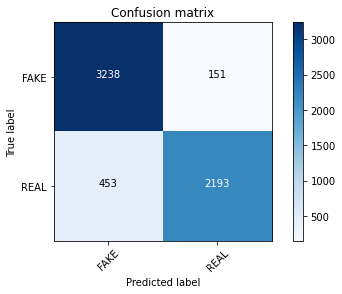

In [ ]:
#plotting the confusion matrix by calling the matplotlibe function we have above

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
# values of confusion matrix without plotting
cm

array([[3238,  151],
       [ 453, 2193]])

# next one to consider - multinomial NB with hyperparameter

In [ ]:
classifier = MultinomialNB(alpha=0.1) #let's take 0.1 as starrting value of alpha

In [ ]:
#finding the accuracy for each value of alpha starting from 0 to 1 incementing by 0.1
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.9022369511184756
Alpha: 0.1, Score : 0.9017398508699255
Alpha: 0.2, Score : 0.9020712510356255
Alpha: 0.30000000000000004, Score : 0.9022369511184756
Alpha: 0.4, Score : 0.9020712510356255
Alpha: 0.5, Score : 0.9014084507042254
Alpha: 0.6000000000000001, Score : 0.9015741507870754
Alpha: 0.7000000000000001, Score : 0.9012427506213753
Alpha: 0.8, Score : 0.9009113504556753
Alpha: 0.9, Score : 0.9005799502899752


In [ ]:
feature_names = tfidf_v.get_feature_names()
classifier.coef_[0]

array([-9.52147382, -8.98567005, -8.75019038, ..., -9.00768675,
       -8.29304531, -8.47560634])

In [ ]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.400573176146374, 'clinton'),
 (-5.504449523154856, 'trump'),
 (-5.689699395630466, 'hillari'),
 (-5.927658316663332, 'us'),
 (-5.943924155634382, 'elect'),
 (-6.141141898356725, 'peopl'),
 (-6.153679149791046, 'vote'),
 (-6.1855372689534684, 'state'),
 (-6.209385038898738, 'email'),
 (-6.231070569259119, 'one'),
 (-6.304754452471091, 'hillari clinton'),
 (-6.30763946084777, 'fbi'),
 (-6.325864550609382, 'would'),
 (-6.334934576217139, 'like'),
 (-6.373788650596871, 'american'),
 (-6.392869520601681, 'time'),
 (-6.398029580588211, 'war'),
 (-6.415258514684246, 'world'),
 (-6.450564452209334, 'year'),
 (-6.459455119306126, 'octob')]

In [ ]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-10.991740188222842, 'brief post'),
 (-10.991740188222842, 'follow pam'),
 (-10.991740188222842, 'follow pam key'),
 (-10.991740188222842, 'gold medal'),
 (-10.991740188222842, 'gorsuch'),
 (-10.991740188222842, 'judg gorsuch'),
 (-10.991740188222842, 'key twitter'),
 (-10.991740188222842, 'key twitter pamkeynen'),
 (-10.991740188222842, 'morn brief'),
 (-10.991740188222842, 'mr ail'),
 (-10.991740188222842, 'mr bannon'),
 (-10.991740188222842, 'mr castro'),
 (-10.991740188222842, 'mr christi'),
 (-10.991740188222842, 'mr cruz'),
 (-10.991740188222842, 'mr de'),
 (-10.991740188222842, 'mr flynn'),
 (-10.991740188222842, 'mr kushner'),
 (-10.991740188222842, 'mr roof'),
 (-10.991740188222842, 'mr sander'),
 (-10.991740188222842, 'mr scott')]